In [1]:
import numpy as np
import tensorflow as tf
import math
from matplotlib import pyplot as plt
from urllib import request
from sklearn.metrics import ConfusionMatrixDisplay
example1_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_label.csv"
example2_url="https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/prostata_data.csv"
f = request.urlopen(example1_url)
dataset_label = np.loadtxt(f, dtype=str, delimiter=",", skiprows=1)
f = request.urlopen(example2_url)
dataset_data = np.loadtxt(f, dtype=float, delimiter=",", skiprows=1)

### Curado de datos

In [2]:
indexado_dataset = dataset_label[:, 1] != ''
dataset_label = dataset_label[indexado_dataset, :]
dataset_data = dataset_data[indexado_dataset, 1:]

### Modelo

In [3]:
X_train = dataset_data
y_train = dataset_label[:, 1:]
labels = {'healthy': 0, 'cancer': 1, 'post-surgery': 2, 'benign': 3}
for label in labels:
  y_train[y_train == label] = labels[label]
y_train = y_train.astype(int)
X_normalized = (X_train - X_train.mean(axis=0))/X_train.std(axis=0)

In [4]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=762, activation='softmax'))
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
hist = model.fit(x=X_normalized, y=y_train, batch_size = 256, epochs=3000,callbacks=[es])

Epoch 1/3000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 1s 9ms/step - loss: 2.7130 - accuracy: 0.1821
Epoch 2/3000
2/2 [==============================] - 0s 9ms/step - loss: 2.4515 - accuracy: 0.1974
Epoch 3/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2256 - accuracy: 0.2231
Epoch 4/3000
2/2 [==============================] - 0s 15ms/step - loss: 2.0337 - accuracy: 0.2462
Epoch 5/3000
2/2 [==============================] - 0s 8ms/step - loss: 1.8715 - accuracy: 0.3000
Epoch 6/3000
2/2 [==============================] - 0s 14ms/step - loss: 1.7416 - accuracy: 0.3359
Epoch 7/3000
2/2 [==============================] - 0s 19ms/step - loss: 1.6383 - accuracy: 0.3846
Epoch 8/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.5521 - accuracy: 0.4154
Epoch 9/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.4843 - accuracy: 0.4385
Epoch 10/3000
2/2 [==============================] - 0s 11ms/step - loss: 1.4306 - accuracy: 0.4590
Epoch 11/3000
2/2 [=======

### Confusion matrix

13/13 [==============================] - 0s 4ms/step


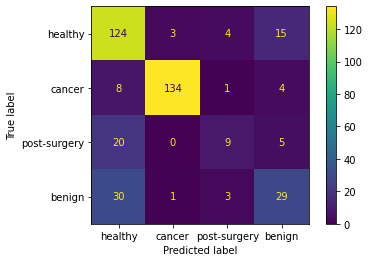

In [5]:
y_pred = np.argmax(model.predict(x=X_normalized), axis = 1).reshape(390, 1)


matrix = ConfusionMatrixDisplay.from_predictions(y_train, y_pred, display_labels = labels.keys())

### PCA

#### Parte 1

In [6]:
from sklearn import decomposition

X0 = X_train - np.mean(X_train, axis = 0)
n,dx=np.shape(X_train)
C=X0.T @ X0/n
ava, ave = np.linalg.eig(C)

In [7]:
ECM = []
for dim in range(1, dx + 1):
  U = X0 @ ave[:,:dim]
  Xh = U @ ave[:,:dim].T
  ECM_iter = np.sum((X0-Xh)**2)/n
  ECM.append(ECM_iter)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


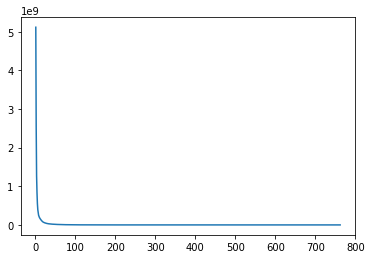

In [8]:
plt.plot(list(range(1, dx + 1)), ECM)
plt.show()

#### Parte 2

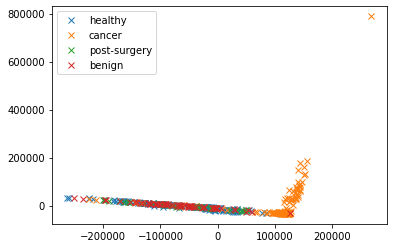

In [9]:
pca = decomposition.PCA(n_components=2)
pca.fit(X0)
U = pca.transform(X0) 
Xh = pca.inverse_transform(U)
for name, label in [('healthy', 0), ('cancer', 1), ('post-surgery', 2), ('benign', 3)]:
  plt.plot(U[(y_train.T[0]==label).T, 0],U[y_train.T[0]==label,1],'x',label=name)
plt.legend()  
plt.show()

Aparenta ser más fácil de clasificar el grupo de los que tienen cáncer de próstata.